In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Hopfield Network

Hopfield Network is a type of recurrent neural network that can be used to store information and retrieve it later. It is a single layer network where the output of the network is fed back to the input layer. The network is trained by adjusting the weights between the neurons so that the desired pattern is obtained at the output. The network is trained in a supervised manner. The network is trained by using Hebbian learning rule. The weights are adjusted by using the following equation:

$$w_{ij} = \sum_{p=1}^{P} x_{i}^{p} x_{j}^{p}$$

where $w_{ij}$ is the weight between the $i^{th}$ and $j^{th}$ neuron, $x_{i}^{p}$ is the $i^{th}$ neuron of the $p^{th}$ pattern and $P$ is the number of patterns. The weights are adjusted until the network converges. The network is trained to store a set of patterns. The network is then tested by giving a noisy version of the stored pattern as input. The network is able to retrieve the original pattern from the noisy input. 


In [206]:
class HopfieldNet:
    def __init__(self, in_features: int):
        self.in_features = in_features
        self.weights = np.zeros((in_features, in_features))
        
    def train(self, x: np.ndarray):
        self.weights += np.dot(x.reshape(-1, 1), x.reshape(1, -1))
        np.fill_diagonal(self.weights, 0)
        
    def predict(self, x: np.ndarray, steps: int = 100):
        output = None
        energy_list = []
        for _ in range(steps):
            x = x.reshape(1, -1)
            output = np.sign(np.dot(x, self.weights))
            energy_list.append(self.energy(output))
            if np.array_equal(output, x):
                break
            x = output
        return output, energy_list
    
    def energy(self, x: np.ndarray):
        first = np.dot(x, self.weights)
        second = np.dot(first, x.T)
        return -0.5 * second
            

In [207]:
def plot_images(images, title):
    fig, axs = plt.subplots(1, len(images), figsize=(15, 15))
    for i, image in enumerate(images):
        axs[i].imshow(image, cmap='gray')
        axs[i].set_title(title[i])
        axs[i].axis('off')
    plt.show()

In [208]:
def add_noise(x, noise_level):
    x = x.copy()
    for i in range(noise_level):
        x[np.random.randint(0, 5), np.random.randint(0, 5)] = -1
    return x

# Training the Network

The network is trained on the mnist dataset. The dataset contains 60000 images of handwritten digits. The images are of size 28x28.


## First we load the dataset and plot some images from the dataset.

In [209]:
def load_dataset(path: str, labels: str, image_size: int = 28, num_images: int = 10000):
    with open(path, 'rb') as f:
        f.read(16)
        buffer = f.read(image_size * image_size * num_images)
        data = np.frombuffer(buffer, dtype=np.uint8).astype(np.float32)
        data = data.reshape(num_images, image_size, image_size)
        data = data / 255
    with open(labels, 'rb') as f:
        f.read(8)
        buffer = f.read(num_images)
        labels = np.frombuffer(buffer, dtype=np.uint8).astype(np.int64)
    return data, labels

In [210]:
data_path = '../data/mnist/train-images.idx3-ubyte'
labels_path = '../data/mnist/train-labels.idx1-ubyte'
train_data, train_labels = load_dataset(data_path, labels_path, num_images=60000)


In [211]:
train_data.shape

(60000, 28, 28)

In [212]:
def plot_single_image(image):
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()
    
def grid_plot(images, titles, rows, cols):
    fig, axs = plt.subplots(rows, cols, figsize=(10, 10))
    if rows == 1 or cols == 1:
        for i in range(rows * cols):
            axs[i].imshow(images[i], cmap='gray')
            axs[i].set_title(titles[i])
            axs[i].axis('off')
    else:
        for i in range(rows):
            for j in range(cols):
                axs[i, j].imshow(images[i * rows + j], cmap='gray')
                axs[i, j].set_title(titles[i * rows + j])
                axs[i, j].axis('off')
    plt.show()

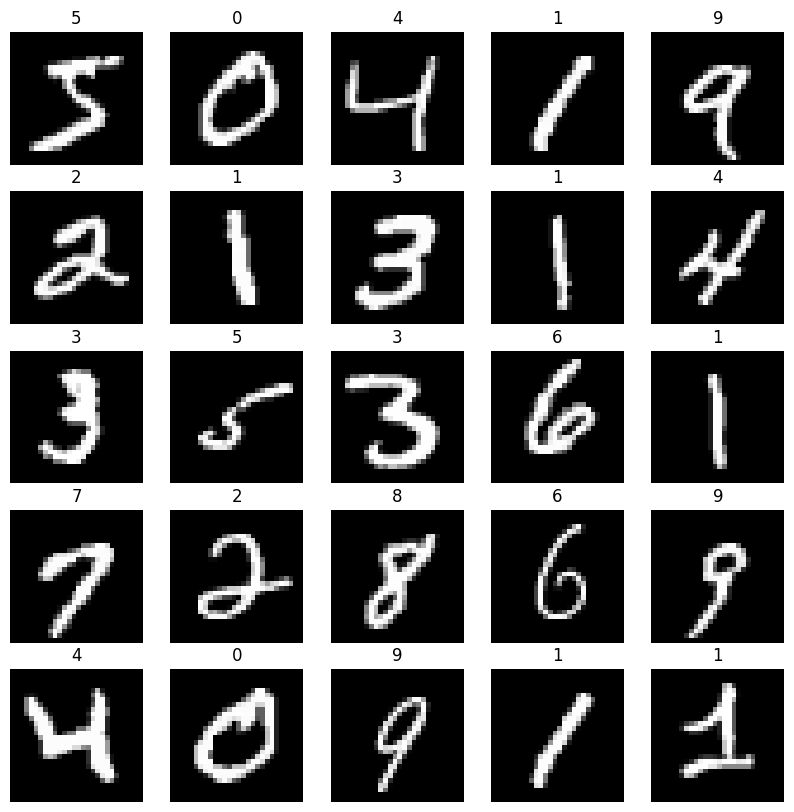

In [213]:
grid_plot(train_data[:25], train_labels[:25], 5, 5)

## Training the Network

Then we train the network on the dataset.

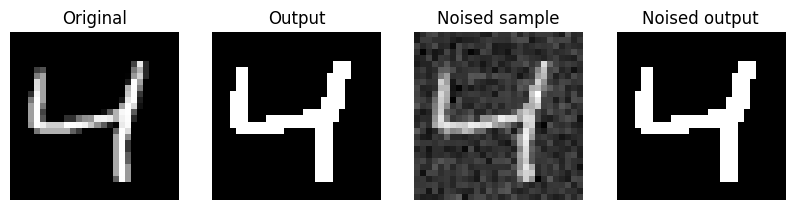

In [216]:
network = HopfieldNet(28 * 28)
sample = train_data[2]
network.train(sample)
output, energies = network.predict(sample)
noised_sample = sample + np.random.normal(0, 0.1, sample.shape)
noised_output, energies = network.predict(noised_sample)

grid_plot([sample, output.reshape(28, 28), noised_sample, noised_output.reshape(28, 28), network.weights], ['Original', 'Output', 'Noised sample', 'Noised output', 'Weights'], 1, 4)

Conclusions

The network produces the good output when the input is a noisy version of the original image or a similar to the source one. 
However, this type of networks is not used in practice because of the following reasons:
1. The network is not able to store a large number of patterns. The network is able to store only 0.138% of the total number of patterns.
2. The network is not able to store patterns that are similar to each other. The network is able to store only one pattern from a set of similar patterns.

Thus, the network is not such general purpose as other neural networks.